## Transit Travel time & distance
Using the Google maps API

In [1]:
import googlemaps
import geopandas as gpd
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load data
mrdh = pd.read_pickle("../v_mrdh/areas_mrdh.pkl")
print("Source CRS:", mrdh.crs)
mrdh.head()

Source CRS: EPSG:28992


,geometry,65x65 Naam,GEBIEDEN,WONINGEN_A,INWONERS_A,ARBEIDSPL_,LLP12EO_AR,LLP0011_AR,PARKEER_TA,AUTOSPERHH,...,1: woningen,2: inwoners,3: inwon0034,4: bbv,5: llp12eo,6: detail,7: industrie,8: rest,9: arbeidspl_totaal,10: gebiedstype
65x65 Nummer,,,,,,,,,,,,,,,,,,,,,
1,"MULTIPOLYGON (((91572.39 435285.08, 91571.6 43...",Rotterdam Centrum,studiegebied RVMK,21529,36209,88158,37649,2213,4.14,0.495,...,21529,36209,18948,16284,37649,9151,7019,71988,88158,1
2,"POLYGON ((89429 435269.999, 89384 435277.999, ...",Delfshaven,studiegebied RVMK,39740,77508,17468,9165,6332,1.76,0.460,...,39740,77508,41160,30429,9165,3430,1068,12970,17468,1
3,"POLYGON ((89677.053 437491.512, 89672.17 43749...",Noord,studiegebied RVMK,29516,52490,12453,10649,2807,1.76,0.425,...,29516,52490,27808,23956,10649,3235,499,8719,12453,1
4,"POLYGON ((93801.859 437558.61, 93800.797 43756...",Kralingen,studiegebied RVMK,30714,53939,25025,36520,4257,1.76,0.480,...,30714,53939,28785,19379,36520,2758,4634,17633,25025,1
5,"POLYGON ((94944.584 431561.346, 94944.374 4315...",IJsselmonde (bi),studiegebied RVMK,22324,45467,16658,4404,3906,0.00,0.650,...,22324,45467,19990,16927,4404,2587,1931,12140,16658,1


In [3]:
# Load NS stations
ns_stations = pd.read_pickle("../travel_api/urban_stations.pkl")
print("Source CRS:", ns_stations.crs)
ns_stations.head()

Source CRS: EPSG:28992


,id,stationType,names,location,tracks,hasKnownFacilities,availableForAccessibleTravel,hasTravelAssistance,areTracksIndependentlyAccessible,isBorderStop,...,1: woningen,2: inwoners,3: inwon0034,4: bbv,5: llp12eo,6: detail,7: industrie,8: rest,9: arbeidspl_totaal,10: gebiedstype
31,"{'uicCode': '8400090', 'evaCode': '8400090', '...",LOCAL_TRAIN_STATION,"{'long': 'Barendrecht', 'medium': 'Barendrcht'...","{'lat': 51.8547210693359, 'lng': 4.5533332824707}","[1, 2, 3, 4]",True,True,True,False,False,...,19278,48738,19426,22221,5376,6030,5169,13908,25107,1
56,"{'uicCode': '8400135', 'evaCode': '8400135', '...",LOCAL_TRAIN_STATION,"{'long': 'Lansingerland-Zoetermeer', 'medium':...","{'lat': 52.042222, 'lng': 4.517222}","[1, 2]",True,True,True,True,False,...,55903,125080,50951,54981,8388,9663,6454,29994,46111,1
62,"{'uicCode': '8400147', 'evaCode': '8400147', '...",LOCAL_TRAIN_STATION,"{'long': 'Capelle Schollevaar', 'medium': 'Sch...","{'lat': 51.9541664123535, 'lng': 4.58416652679...","[1, 2]",True,True,True,False,False,...,31330,66977,26700,28611,3066,5308,4688,24613,34609,1
72,"{'uicCode': '8400166', 'evaCode': '8400166', '...",LOCAL_TRAIN_STATION,"{'long': 'Delft Campus', 'medium': 'Delft Camp...","{'lat': 51.9908332824707, 'lng': 4.36472225189...","[1, 2]",True,True,True,True,False,...,58802,103319,52411,38937,39021,6907,5996,37415,50318,1
76,"{'uicCode': '8400170', 'evaCode': '8400170', '...",INTERCITY_HUB_STATION,"{'long': 'Delft', 'medium': 'Delft', 'short': ...","{'lat': 52.0066680908203, 'lng': 4.35638904571...","[1, 2]",True,True,True,True,False,...,58802,103319,52411,38937,39021,6907,5996,37415,50318,1


In [4]:
# Load the polygons from pickle
with open("../data/polygons.pkl", "rb") as f:
    city_polygon, area_polygon, autoluw_polygon = pickle.load(f)

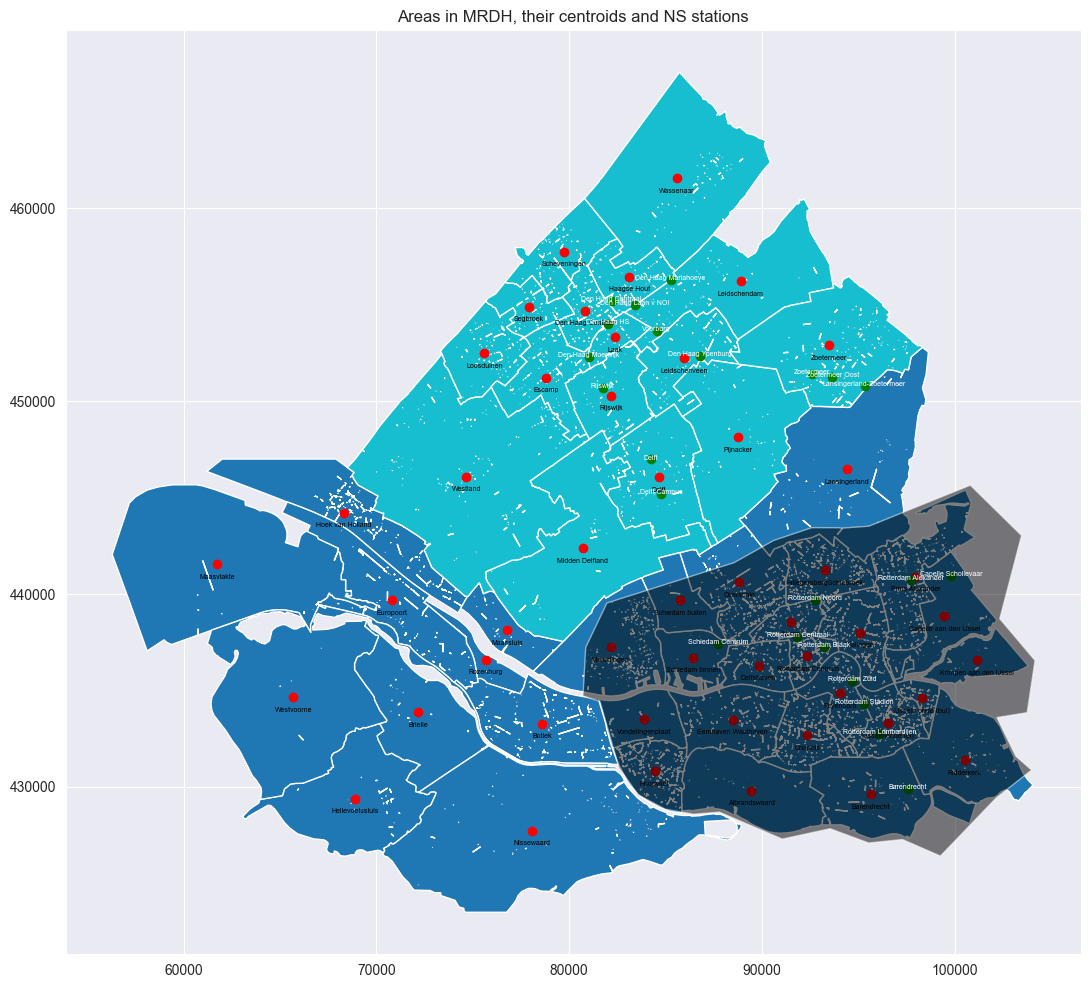

In [5]:
fig, ax = plt.subplots(figsize=(16, 12))
# Filter data to only include postcodes in the Randstad
mrdh.plot(column="GEBIEDEN", figsize=(16, 12), ax=ax)
# Add the centroids
mrdh.centroid.plot(ax=ax, color="red")
# Add the name labels above the centroids
for x, y, label in zip(mrdh.centroid.x, mrdh.centroid.y-750, mrdh["65x65 Naam"]):
    ax.text(x, y, label, color="black", fontsize=5, ha="center")
    
# Add the NS stations
ns_stations.plot(ax=ax, color="green")
# Add the name labels above the NS stations
for x, y, label in zip(ns_stations.geometry.x, ns_stations.geometry.y, ns_stations["name"]):
    ax.text(x, y, label, color="white", fontsize=5, ha="center")

# Add the city polygon (CRS 3857)
city_polygon_series = gpd.GeoSeries(city_polygon, crs="epsg:4326")
# Convert to epsg:28992
city_polygon_series = city_polygon_series.to_crs(epsg=28992)
city_polygon_series.plot(ax=ax, color="black", alpha=0.5)
# Add a title
plt.title("Areas in MRDH, their centroids and NS stations")
# Save the plot
plt.savefig("img/areas_mrdh_ns_stations.png", dpi=300, bbox_inches="tight")

### Add the 65x65 areas to the population data

In [6]:
# Load areas_65.pkl
areas_65 = pd.read_pickle("../v_mrdh/areas_65.pkl")

In [7]:
# Load the population data
population = pd.read_pickle("../data/population_data_pc4.pkl")
# Remove 0 inhabitants
population = population[population['aantal_inwoners'] > 0]

In [8]:
# Perform the spatial join with the 'touches' predicate
pop_mrdh = gpd.sjoin(population, areas_65, how='inner', predicate='intersects')

# Calculate the intersection areas
pop_mrdh['intersection_area'] = pop_mrdh.apply(
    lambda row: row.geometry.intersection(areas_65.loc[row['65x65 Nummer']].geometry).area, axis=1
)

# Sort the result by intersection area in descending order and drop duplicates, keeping the largest
pop_mrdh = pop_mrdh.sort_values(by='intersection_area', ascending=False)
# Drop duplicates, keeping one row per postcode
pop_mrdh = pop_mrdh.drop_duplicates(subset='postcode', keep='first')

In [9]:
# Stupid fix for an extra polygon in the multipolygon geometry in postcode 3053 and 2641
from shapely.geometry import MultiPolygon

pop_mrdh.loc[pop_mrdh["postcode"] == 3053, 'geometry'] = pop_mrdh.loc[pop_mrdh["postcode"] == 3053, 'geometry'].apply(lambda geom: MultiPolygon(list(geom.geoms)[:-1]) if isinstance(geom, MultiPolygon) else geom)
pop_mrdh.loc[pop_mrdh["postcode"] == 2641, 'geometry'] = pop_mrdh.loc[pop_mrdh["postcode"] == 2641, 'geometry'].apply(lambda geom: MultiPolygon(list(geom.geoms)[:-1]) if isinstance(geom, MultiPolygon) else geom)

In [10]:
# Remove areas with 0 INWONERS_A
pop_mrdh = pop_mrdh[pop_mrdh['INWONERS_A'] > 0]
mrdh = mrdh[mrdh['INWONERS_A'] > 0]

# Remove areas from mrdh with no population
# mrdh = mrdh[mrdh.index.isin(pop_mrdh['65x65 Nummer'])]

In [11]:
# Save 
pop_mrdh.to_pickle("../data/population_data_pc4_65coded.pkl")

### Calculate weighted centroids

In [12]:
# Drop any columns with a 65x65 Nummer that not in the mrdh index
pop_mrdh_sel = pop_mrdh[pop_mrdh['65x65 Nummer'].isin(mrdh.index)]

In [13]:
from shapely.geometry import Point

# Step 1: Group by 65x65 Nummer
grouped = pop_mrdh_sel.groupby('65x65 Nummer')

# Step 2: Calculate weighted centroids
def weighted_centroid(group):
    total_population = group['aantal_inwoners'].sum()
    wx = (group.geometry.centroid.x * group['aantal_inwoners']).sum() / total_population
    wy = (group.geometry.centroid.y * group['aantal_inwoners']).sum() / total_population
    return pd.Series({'geometry': Point(wx, wy), 'total_population': total_population})

# Apply the function to selected columns
weighted_centroids = grouped[['geometry', 'aantal_inwoners']].apply(weighted_centroid).reset_index()

# Step 3: Create a new geodataframe with the results. Set the 65x65 Nummer as the index
result_gdf = gpd.GeoDataFrame(weighted_centroids, geometry='geometry')
result_gdf.set_index('65x65 Nummer', inplace=True)

# Step 4: Add the weighted centroids to the mrdh geodataframe
mrdh = mrdh.copy()  # Create a copy to avoid SettingWithCopyWarning
mrdh.loc[:, 'weighted_centroid'] = result_gdf['geometry']

# Save the result
mrdh.to_pickle("../data/areas_mrdh_weighted_centroids.pkl")

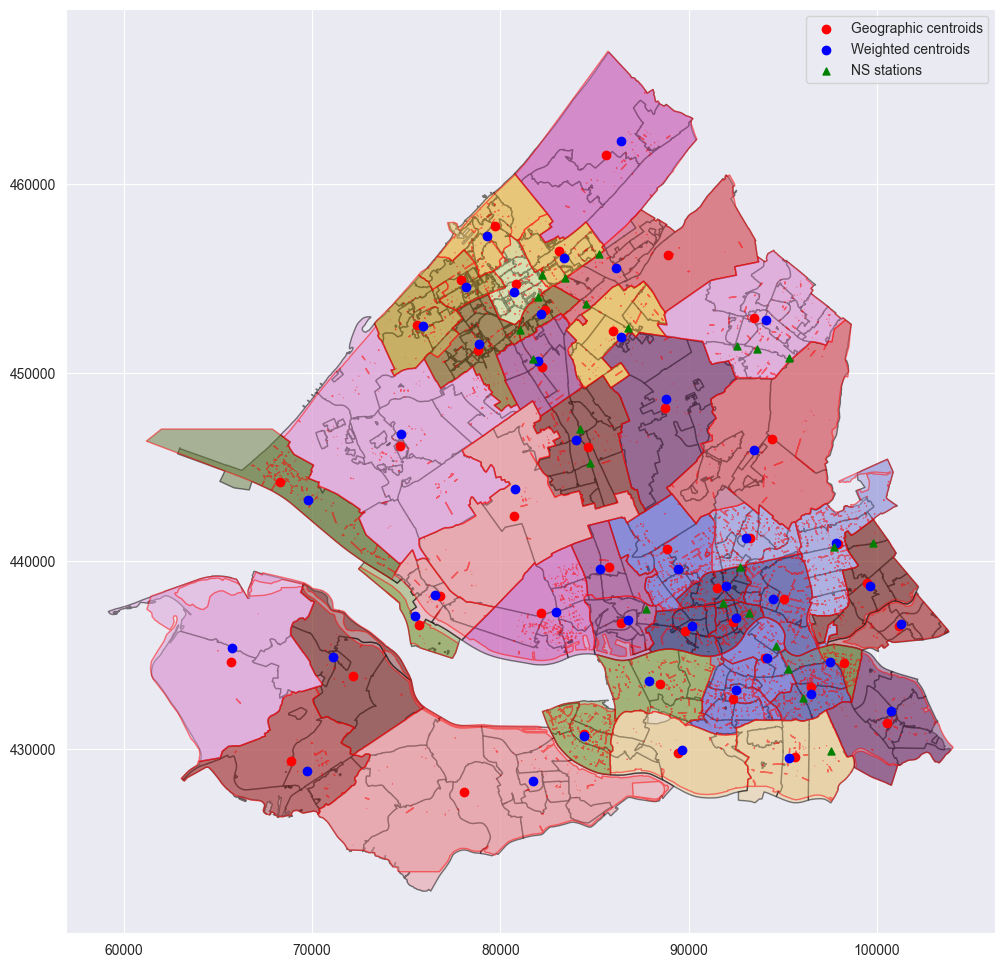

In [14]:
# Plot the population over the map
fig, ax = plt.subplots(figsize=(16, 12))
pop_mrdh_sel.plot(figsize=(16, 12), ax=ax, alpha=0.5, column="65x65 Nummer", cmap="tab20b", edgecolor="black")
mrdh.plot(column=mrdh.index.values, figsize=(16, 12), ax=ax, cmap='tab20b', alpha=0.5, edgecolor='red')
# Add the centroids
mrdh.centroid.plot(ax=ax, color="red")
# Add the weighted centroids
mrdh.weighted_centroid.plot(ax=ax, color="blue")
# Add the NS stations, as a triangle
ns_stations.plot(ax=ax, color="green", marker="^", markersize=25)
# Add a legend
ax.legend(["Geographic centroids", "Weighted centroids", "NS stations"])
# Save the plot
plt.savefig("img/population_areas_mrdh2.png", dpi=300, bbox_inches="tight")

In [15]:
# Save the population data
pop_mrdh_sel.to_pickle("../data/population_data_pc4_mrdh.pkl")

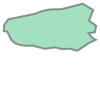

In [16]:
city_polygon

In [17]:
# Select only the 65x65 areas with centroids in the polygon (city_polygon_series
city65 = mrdh[mrdh.centroid.within(city_polygon_series.geometry[0])]
pc65 = pop_mrdh_sel[pop_mrdh_sel['65x65 Nummer'].isin(city65.index)]

# Select the NS stations within the polygon
ns_stations_city = ns_stations[ns_stations.geometry.within(city_polygon_series.geometry[0])]

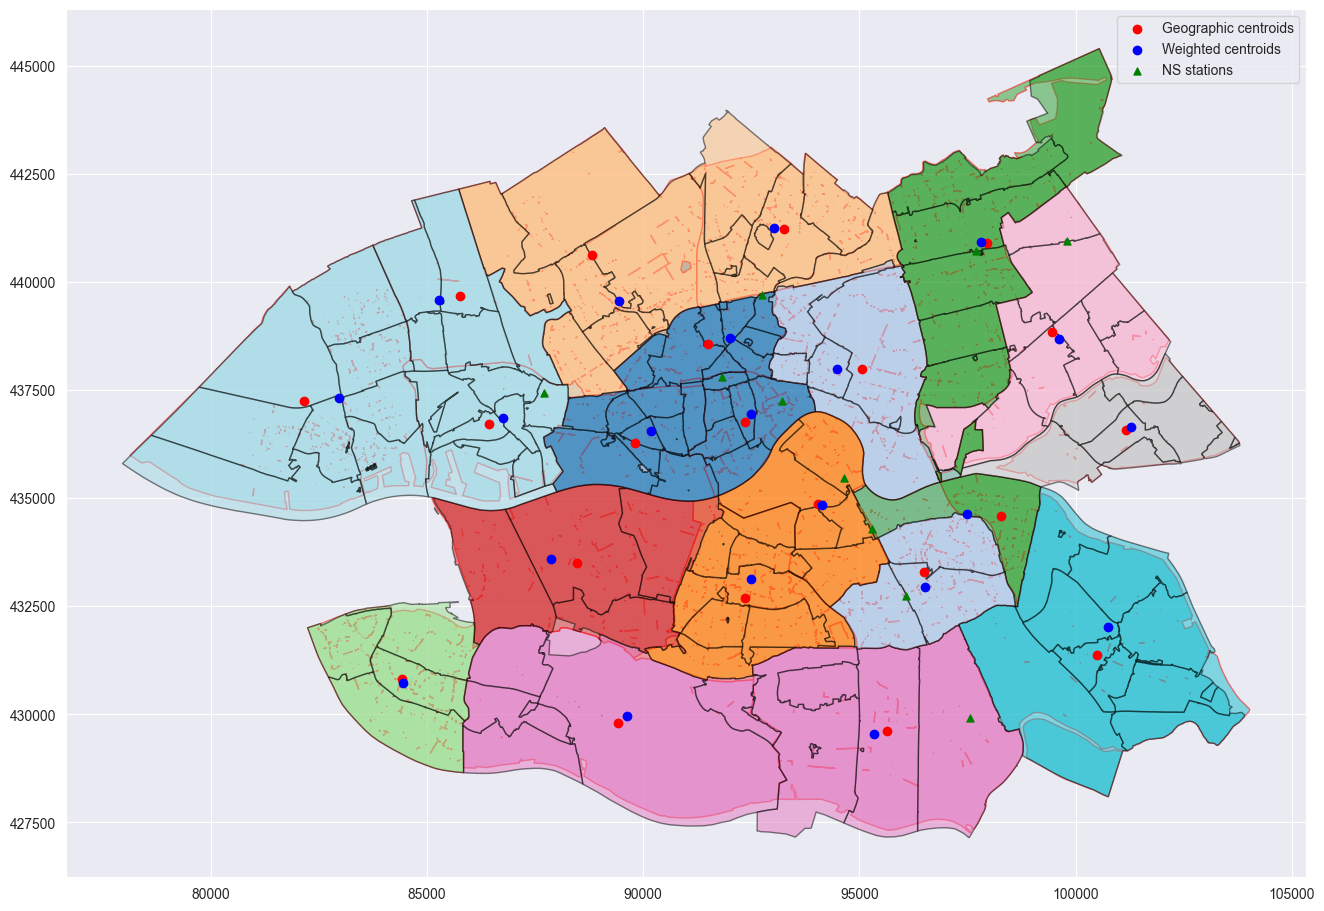

In [18]:
# Plot
fig, ax = plt.subplots(figsize=(16, 12))
city65.plot(column=city65.index.values, ax=ax, cmap='tab20', alpha=0.5, edgecolor='red')
pc65.plot(column="65x65 Nummer", ax=ax, alpha=0.5, cmap="tab20", edgecolor="black")
# Add the centroids
city65.centroid.plot(ax=ax, color="red")
# Add the weighted centroids
city65.weighted_centroid.plot(ax=ax, color="blue")
# Add the NS stations, as a triangle
ns_stations_city.plot(ax=ax, color="green", marker="^", markersize=25)
# Add a legend
ax.legend(["Geographic centroids", "Weighted centroids", "NS stations"])

# Save the plot
plt.savefig("img/rotterdam_65_grid_centroids.png", dpi=300, bbox_inches="tight")

In [19]:
# Set postcode as the index for pc65
pc65.set_index("postcode", inplace=True)

# To dict and save
pc4_to_n65_dict = pc65["65x65 Nummer"].to_dict()
with open("../data/pc4_to_n65_dict.pkl", "wb") as f:
    pickle.dump(pc4_to_n65_dict, f)

### Google maps API

In [20]:
# time: 2024-09-017 08:00:00 (a Thursday)
time = datetime(2024, 9, 19, 8, 0, 0)
print(time)

2024-09-19 08:00:00


In [21]:
# Select stedelijkheid 5 or higher
data_sel = pc65.copy()
# Sort by MRDH area, index
data_sel.sort_values(by=["65x65 Nummer", "postcode"], inplace=True)
# Calculate centroids
data_sel["centroid"] = data_sel["geometry"].centroid

# Convert to EPSG:4326
print("Source CRS:", data_sel.crs)
data_sel = data_sel.to_crs(epsg=4326)
data_sel["centroid"] = data_sel["centroid"].to_crs(epsg=4326)
print("New CRS:", data_sel.crs)
data_sel.head(3)

Source CRS: EPSG:28992
New CRS: EPSG:4326


,aantal_inwoners,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,stedelijkheid,geometry,area,pop_density,...,3: inwon0034,4: bbv,5: llp12eo,6: detail,7: industrie,8: rest,9: arbeidspl_totaal,10: gebiedstype,intersection_area,centroid
postcode,,,,,,,,,,,,,,,,,,,,,
3011,18045,1265,3425,7985,3475,1900,1,"MULTIPOLYGON (((4.48108 51.91055, 4.48081 51.9...",1.640924,10996.856292,...,18948,16284,37649,9151,7019,71988,88158,1,1.639708e+06,POINT (4.48754 51.91869)
3012,6335,470,1100,2920,1135,710,1,"MULTIPOLYGON (((4.47732 51.91157, 4.47731 51.9...",0.583817,10851.010943,...,18948,16284,37649,9151,7019,71988,88158,1,5.832856e+05,POINT (4.47623 51.91857)
3013,1055,70,150,520,195,115,1,"MULTIPOLYGON (((4.466 51.9223, 4.46599 51.9223...",0.300839,3506.855527,...,18948,16284,37649,9151,7019,71988,88158,1,3.002322e+05,POINT (4.46971 51.92431)


In [22]:
# Get API key from /secrets/gmaps_api_key.txt
with open("../secrets/gmap_api_key.txt") as f:
    api_key = f.readline()

In [23]:
# # Single query
# time_1 = datetime(2024, 7, 2, 8, 30, 0)
# origin_1 = ["Rotterdam Alexander, 3068 AV Rotterdam"]
# destinations_1 = ["Delft Campus, 2623 CS Delft"]
# mode_1 = "transit"
# run_1 = False
# 
# if run_1:
#     gmaps = googlemaps.Client(key=api_key)
#     result = gmaps.distance_matrix(
#         origins=origin_1,
#         destinations=destinations_1,
#         mode=mode_1,
#         departure_time=time_1,
#     )
#     result

In [24]:
### Warning: This can be a very expensive cell to run. 5 USD per 1000 elements. The full 125x125 matrix is 78.125 USD, so for both modes it is 156.25 USD. 
def run_google_maps(mode, redownload=False):
    if redownload:
        gmaps = googlemaps.Client(key=api_key)
        
        # Extract centroids and convert them to a suitable format for the Google Maps API
        centroids = data_sel["centroid"].to_list()
        # Select only the first 3 centroids for testing
        centroids = centroids[:4]
        # Note the order of the coordinates: (latitude (y), longitude (x))
        locations = [(centroid.y, centroid.x) for centroid in centroids]
        print(f"{len(locations)} locations: {locations}")
    
        # Initialize dictionaries to hold the travel info
        travel_time_pc4 = {}
        travel_distance_pc4 = {}
    
        # Function to split destinations into chunks of max_chunk_size
        def chunk_destinations(destinations, max_chunk_size=25):
            chunk = [destinations[i:i + max_chunk_size] for i in range(0, len(destinations), max_chunk_size)]
            return chunk

        for i, origin in enumerate(locations):
            destinations = locations
            destination_chunks = chunk_destinations(destinations)

            for chunk in destination_chunks:
                result = gmaps.distance_matrix(
                    origins=[origin],
                    destinations=chunk,
                    mode=mode,
                    departure_time=time,
                )

                # Extract distances and populate the corresponding row in the distance matrix
                for j, destination in enumerate(chunk):
                    if origin != destination:
                        element = result["rows"][0]["elements"][j]
                        destination_index = destinations.index(destination)
                        key = (i, destination_index)
                        
                        if element["status"] == "OK":
                            distance_meters = element["distance"]["value"]
                            duration_seconds = element["duration"]["value"]
                            
                            # Update the travel info dictionaries
                            travel_distance_pc4[key] = distance_meters
                            travel_time_pc4[key] = duration_seconds
                        else:
                            print(f"Error for {key}: {element['status']}")
                        
                        if i == 0 and destination_index == 1:
                            print(f"Example for {key}: {element}")
            # Break after the second origin
            if i == 1:
                break

        # Correct dict keys. The keys are now (index, index) instead of (n65, n65)
        key_to_n65 = {i: n65 for i, n65 in enumerate(data_sel.index)}
        travel_time_pc4 = {(key_to_n65[key[0]], key_to_n65[key[1]]): value for key, value in travel_time_pc4.items()}
        travel_distance_pc4 = {(key_to_n65[key[0]], key_to_n65[key[1]]): value for key, value in travel_distance_pc4.items()}

        # Save as pickle
        with open(f"../data/travel_time_distance_google_{mode}_pc4.pkl", "wb") as f:
            pickle.dump((travel_time_pc4, travel_distance_pc4), f)
        print(f"Saved travel_time_distance_google_{mode}_pc4.pkl")

    else:
        print(f"Skipping Google Maps API, loading: travel_time_distance_google_{mode}_pc4.pkl")
        with open(f"../data/travel_time_distance_google_{mode}_pc4.pkl", "rb") as f:
            travel_time_pc4, travel_distance_pc4 = pickle.load(f)

    return travel_time_pc4, travel_distance_pc4

# Run the Google Maps API
travel_time_dict = {}
travel_distance_dict = {}

redownload = False
for mode in ["transit", "bicycling"]:
    travel_time, travel_distance = run_google_maps(mode=mode, redownload=redownload)
    travel_time_dict[mode] = travel_time
    travel_distance_dict[mode] = travel_distance

Skipping Google Maps API, loading: travel_time_distance_google_transit_pc4.pkl
Skipping Google Maps API, loading: travel_time_distance_google_bicycling_pc4.pkl


In [25]:
key_list = list(travel_time_dict["transit"].keys())
# The keys are tuples. Get the unique values for the first element
unique_keys = set([key[0] for key in key_list])
print(f"Unique keys: {unique_keys}")

Unique keys: {3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3121, 3122, 3123, 3124, 3125, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3161, 3162, 3171, 3172, 3176, 3191, 3192, 3193, 3194, 3195, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2921, 2922, 2923, 2924, 2925, 2926, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2991, 2992, 2993, 2994, 3011, 3012, 3013, 3014, 3015, 3016, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3051, 3052, 3053, 3054, 3055, 3056, 3059, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3071}


In [26]:
# Create a combined name: 65x65 Naam (pc4)
data_sel["combined_name"] = data_sel["65x65 Naam"] + " (" + data_sel.index.astype(str) + ")"
print(data_sel[["65x65 Naam", "combined_name"]].head(3))
n65_to_name = data_sel["combined_name"].to_dict()

# replace the (index, index) keys with the (name, name) keys
for mode in travel_time_dict.keys():
    travel_time_dict[mode] = {(n65_to_name[key[0]], n65_to_name[key[1]]): value for key, value in travel_time_dict[mode].items()}
    travel_distance_dict[mode] = {(n65_to_name[key[0]], n65_to_name[key[1]]): value for key, value in travel_distance_dict[mode].items()}

                 65x65 Naam             combined_name
postcode                                             
3011      Rotterdam Centrum  Rotterdam Centrum (3011)
3012      Rotterdam Centrum  Rotterdam Centrum (3012)
3013      Rotterdam Centrum  Rotterdam Centrum (3013)


In [27]:
# Create dataframe from the first mode in the dictionary
first_mode = next(iter(travel_time_dict))
travel_time_df = pd.DataFrame.from_dict(travel_time_dict[first_mode], orient='index', columns=[first_mode])

# Add columns for other modes
for mode, times in travel_time_dict.items():
    if mode != first_mode:
        travel_time_df[mode] = times.values()

# Split index into Origin and Destination
travel_time_df.index = pd.MultiIndex.from_tuples(travel_time_df.index, names=['Origin', 'Destination'])
travel_time_df["trans-bike-diff"] = travel_time_df["transit"] - travel_time_df["bicycling"]
travel_time_df.head(3)

transit  bicycling  \
Origin                   Destination                                    
Rotterdam Centrum (3011) Rotterdam Centrum (3012)      578        162   
                         Rotterdam Centrum (3013)      800        465   
                         Rotterdam Centrum (3014)     1015        343   

                                                   trans-bike-diff  
Origin                   Destination                                
Rotterdam Centrum (3011) Rotterdam Centrum (3012)              416  
                         Rotterdam Centrum (3013)              335  
                         Rotterdam Centrum (3014)              672

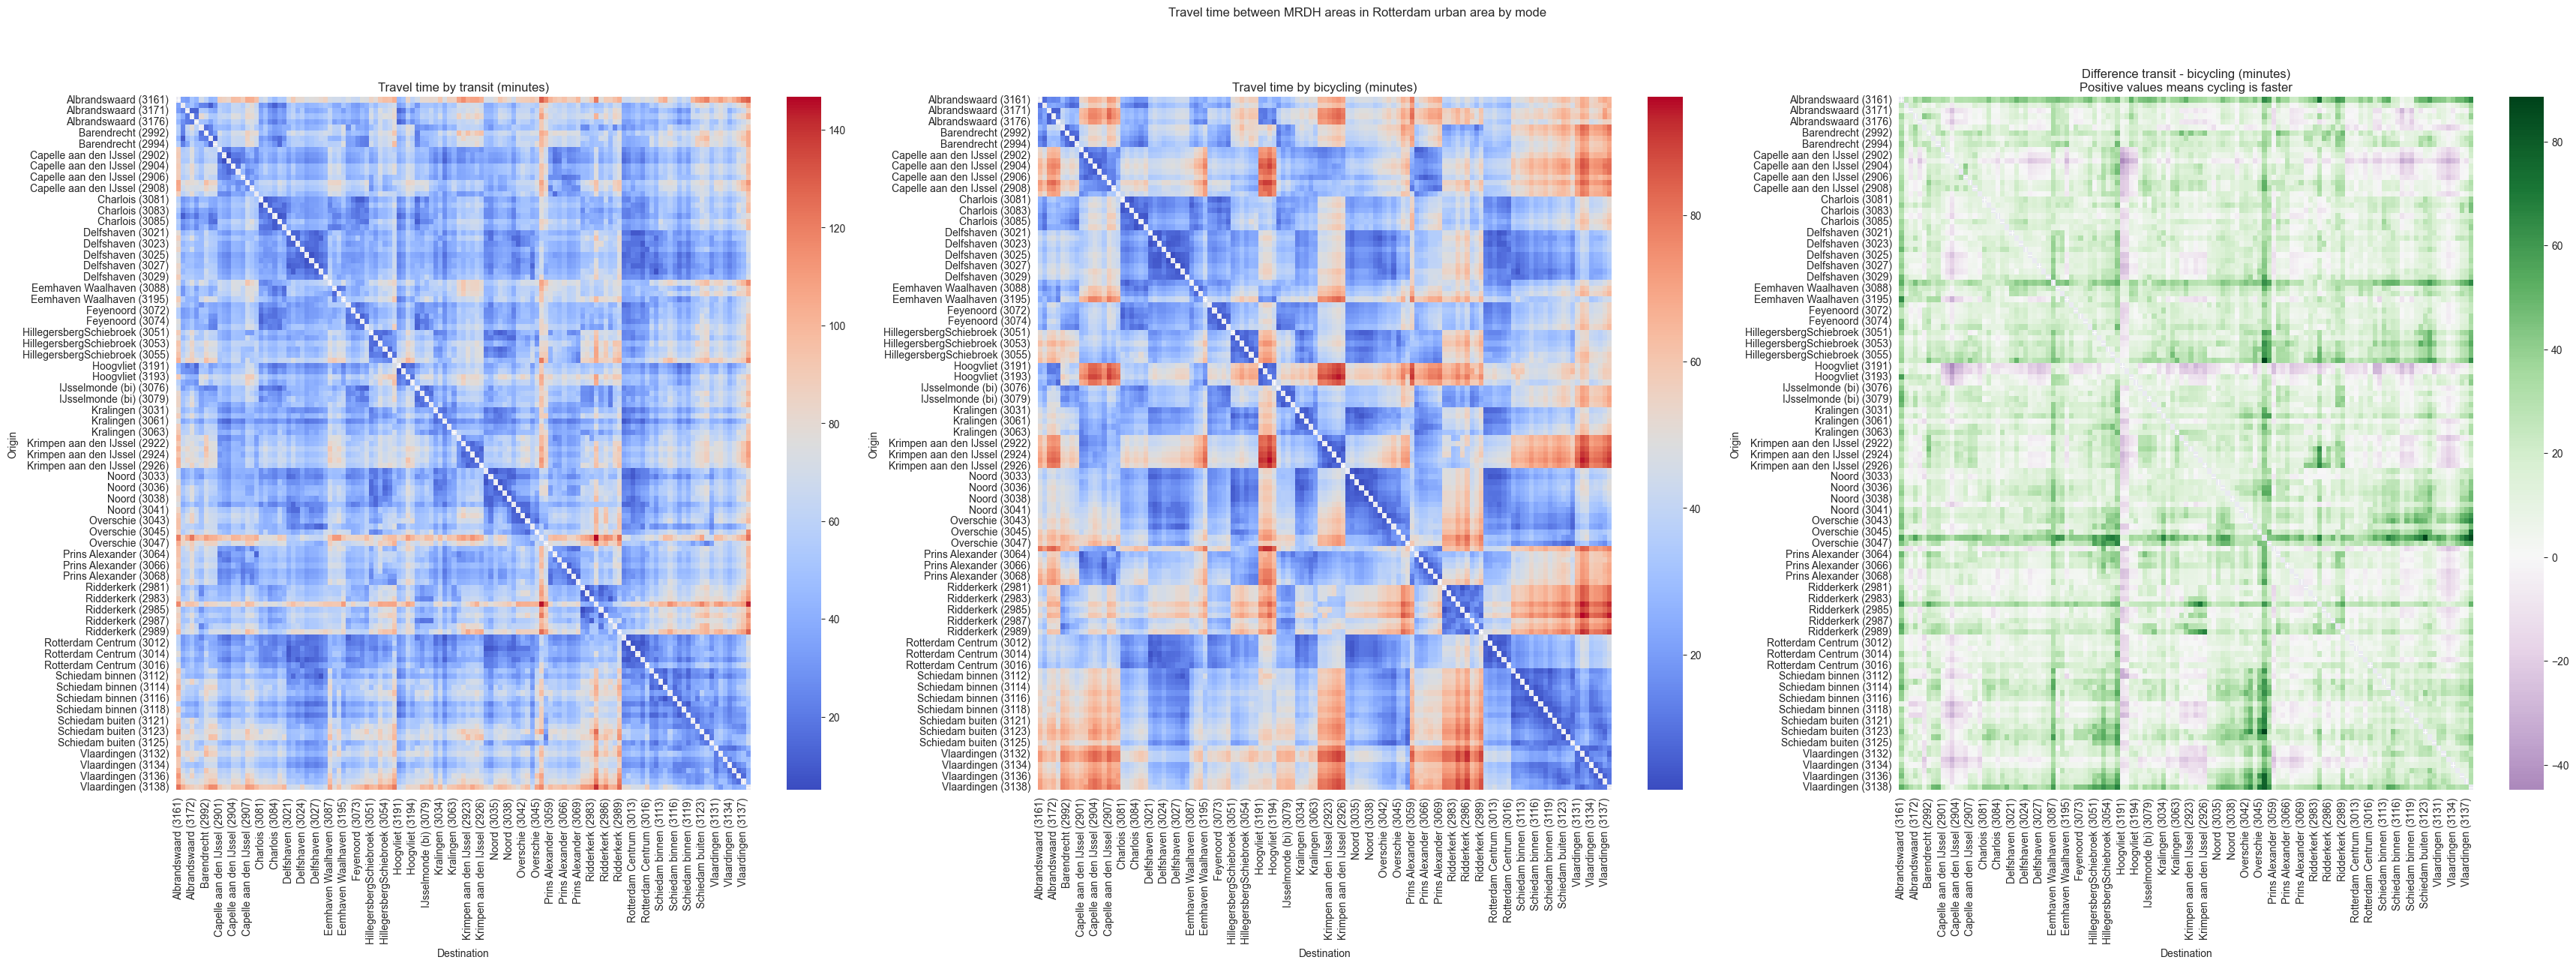

In [28]:
# Create two subplots
fig, axs = plt.subplots(1, 3, figsize=(42, 12))

# Directly use travel_time_df
for i, mode in enumerate(travel_time_dict.keys()):
    # Heatmap with seaborn
    sns.heatmap((travel_time_df[mode]/60).unstack(), annot=False, fmt=".0f", cmap="coolwarm", ax=axs[i])
    axs[i].set_title(f"Travel time by {mode} (minutes)")

# Add a plot with the difference between the two modes. Set 0 as the middle value.
sns.heatmap((travel_time_df["trans-bike-diff"]/60).unstack(), annot=False, fmt=".0f", cmap="PRGn", ax=axs[2], center=0)
axs[2].set_title("Difference transit - bicycling (minutes)\nPositive values means cycling is faster")

# Add title
plt.suptitle("Travel time between MRDH areas in Rotterdam urban area by mode")
# Save the plot
plt.savefig("img/travel_time_heatmap.png", dpi=300, bbox_inches="tight")

In [29]:
# Convert the data to epsg:28992
data = data_sel.to_crs(epsg=28992)

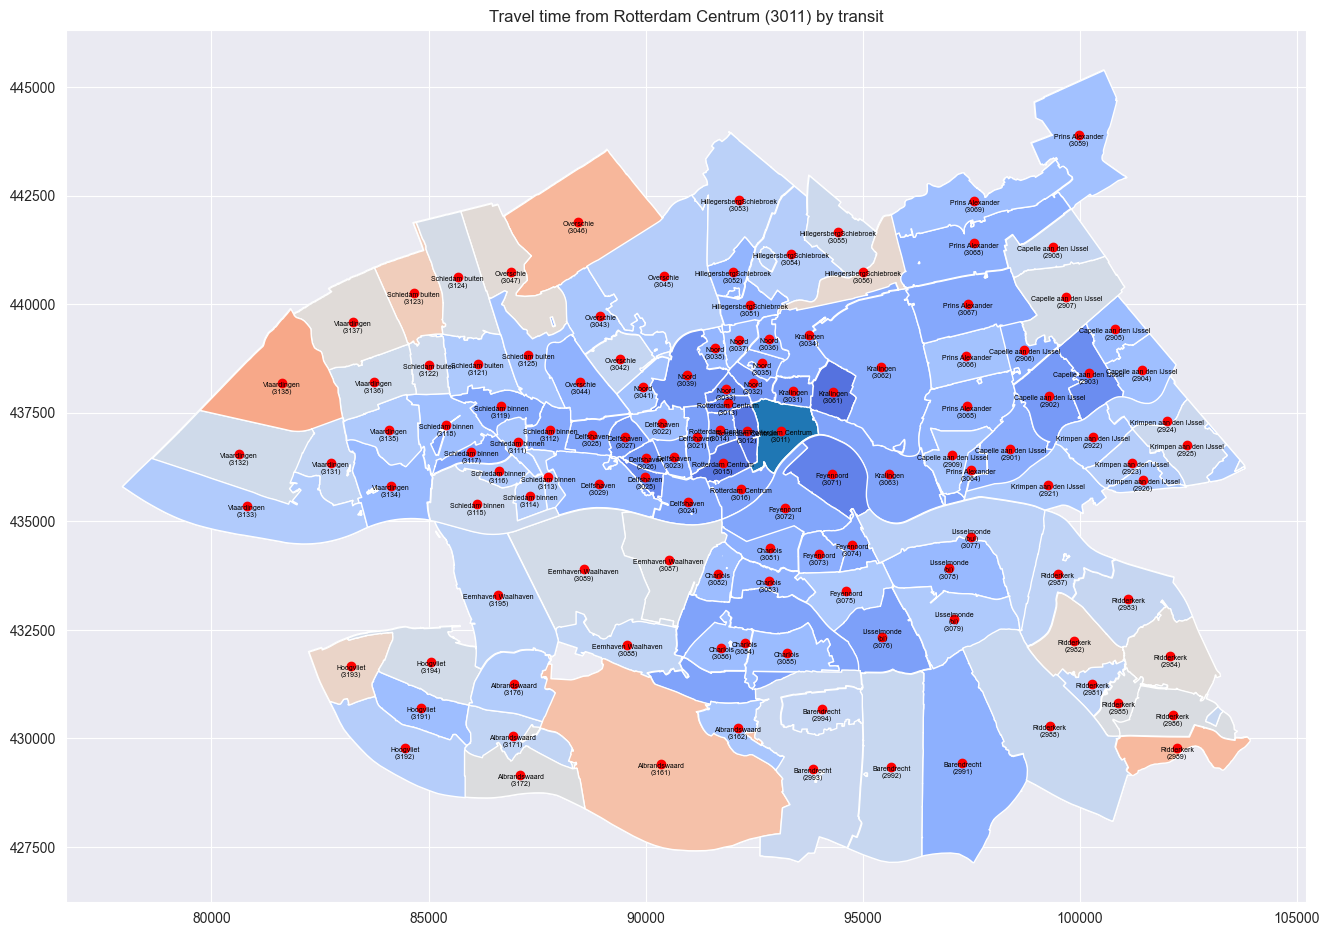

In [30]:
mode_m = "transit"
origin_m = "Rotterdam Centrum (3011)"
# Plot a map with the travel time from Rotterdam Centrum to all other areas. Green means short travel time, red means long travel time
fig, ax = plt.subplots(figsize=(16, 12))
data.plot(column="GEBIEDEN", figsize=(16, 12), ax=ax)
# Add the name labels above the centroids
for x, y, label in zip(data.centroid.x, data.centroid.y-250, data["combined_name"]):
    # Replace the " (" with a newline
    label = label.replace(" (", "\n(")
    ax.text(x, y, label, color="black", fontsize=5, ha="center")
# Add the travel time from Rotterdam Centrum
for idx, row in data.iterrows():
    destination = row["combined_name"]
    if destination == origin_m:
        continue
    travel_time = travel_time_dict[mode_m][(origin_m, destination)]
    if travel_time is not None:
        color = sns.color_palette("coolwarm", as_cmap=True)(travel_time / travel_time_df[mode].max())
        data[data["combined_name"] == destination].plot(color=color, ax=ax)
# Set title
plt.title(f"Travel time from {origin_m} by {mode_m}")
# Add the centroids
data.centroid.plot(ax=ax, color="red")
# Save the plot
plt.savefig(f"img/travel_time_{origin_m.lower().replace(' ', '_')}_{mode_m}.png", dpi=300, bbox_inches="tight")

In [31]:
from geopy.distance import geodesic

In [32]:
# Calculate the distance between all centroids
distances = {}
for i, origin in data_sel.iterrows():
    for j, destination in data_sel.iterrows():
        if i != j:
            key = (origin["combined_name"], destination["combined_name"])
            distances[key] = geodesic((origin["centroid"].y, origin["centroid"].x), (destination["centroid"].y, destination["centroid"].x)).kilometers

In [33]:
# Add the distances to the travel_time_df
travel_time_df["distance"] = [distances[key] for key in travel_time_df.index]
travel_time_df.head()

transit  bicycling  \
Origin                   Destination                                    
Rotterdam Centrum (3011) Rotterdam Centrum (3012)      578        162   
                         Rotterdam Centrum (3013)      800        465   
                         Rotterdam Centrum (3014)     1015        343   
                         Rotterdam Centrum (3015)      601        349   
                         Rotterdam Centrum (3016)     1210        572   

                                                   trans-bike-diff  distance  
Origin                   Destination                                          
Rotterdam Centrum (3011) Rotterdam Centrum (3012)              416  0.777912  
                         Rotterdam Centrum (3013)              335  1.376185  
                         Rotterdam Centrum (3014)              672  1.397206  
                         Rotterdam Centrum (3015)              252  1.512603  
                         Rotterdam Centrum (3016)              638  1.621379

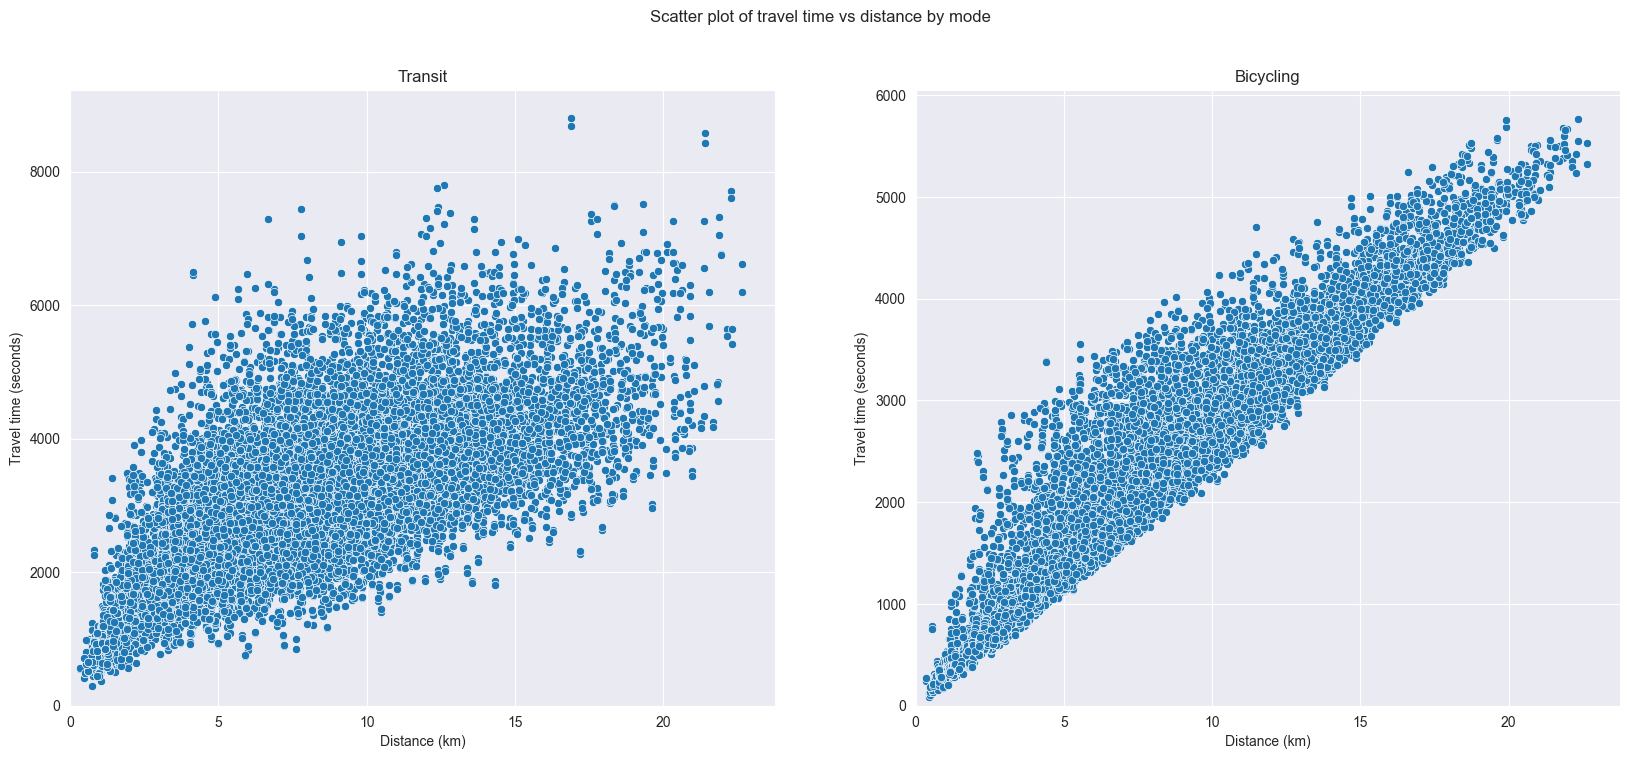

In [34]:
# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

for i, mode in enumerate(travel_time_dict.keys()):
    # Scatter plot with seaborn
    sns.scatterplot(data=travel_time_df, x="distance", y=mode, ax=axs[i])
    axs[i].set_title(mode.capitalize())
    axs[i].set_xlabel("Distance (km)")
    axs[i].set_ylabel("Travel time (seconds)")
    # X and y axis start at 0
    axs[i].set_xlim(0, None)
    axs[i].set_ylim(0, None)

# Add title
plt.suptitle("Scatter plot of travel time vs distance by mode")
# Save the plot
plt.savefig("img/travel_time_distance_scatter.png", dpi=300, bbox_inches="tight")

### Areas and resolutions
This project has 4 relevant areas:
- The Netherlands
- The Metropoolregio Rotterdam Den Haag (MRDH)
- The "area" polygon, which is currently Rotterdam with some margin, custom defined.
- The "city" polygon, which is the currently city of Rotterdam, custom defined.

The resolutions are as follows:
- pc4: Postcode 4, the first 4 digits of the postcode
- v65: The 65x65 areas, as used in the V-MRDH traffic model

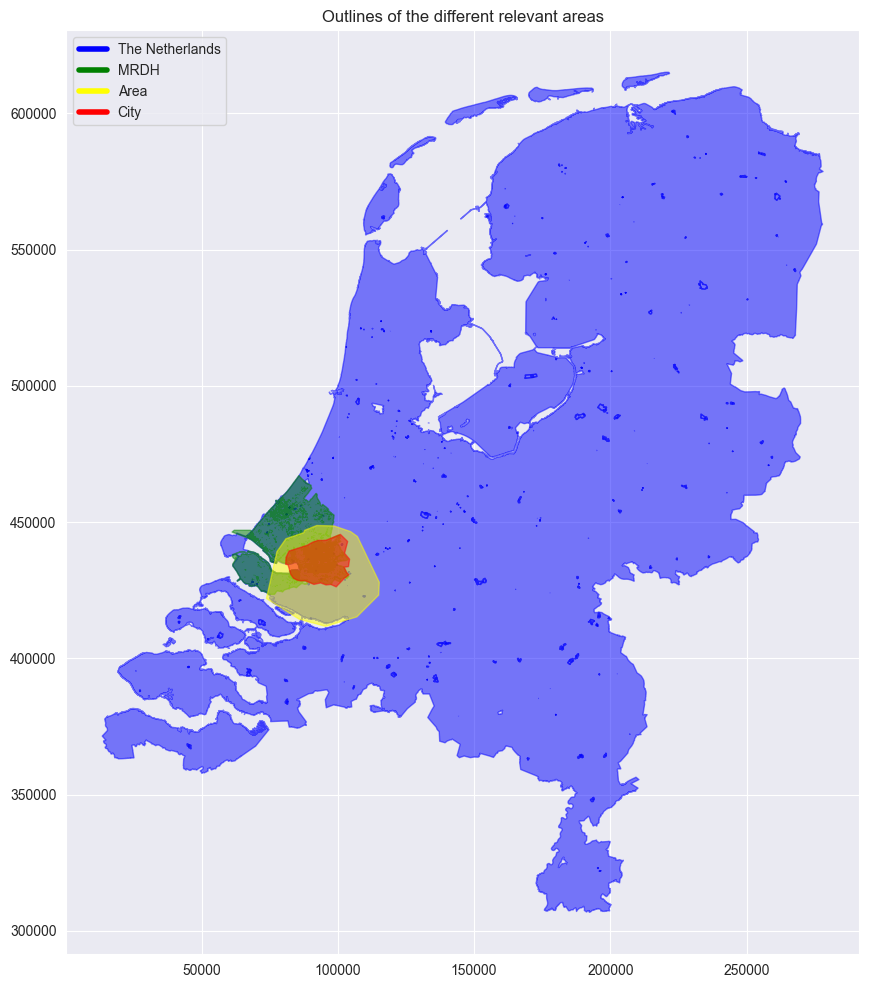

In [35]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the outlines of the different relevant areas
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the outlines of the areas
nl_outline = population.union_all()
gpd.GeoSeries(nl_outline).plot(ax=ax, color="blue", alpha=0.5, edgecolor="blue")

mrdh_outline = mrdh.union_all()
gpd.GeoSeries(mrdh_outline).plot(ax=ax, color="green", alpha=0.5, edgecolor="green")

area_polygon_series = gpd.GeoSeries(area_polygon, crs="epsg:4326").to_crs(epsg=28992)
area_polygon_series.plot(ax=ax, color="yellow", alpha=0.5, edgecolor="yellow")

city_polygon_series.plot(ax=ax, color="red", alpha=0.5, edgecolor="red")

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='The Netherlands'),
    Line2D([0], [0], color='green', lw=4, label='MRDH'),
    Line2D([0], [0], color='yellow', lw=4, label='Area'),
    Line2D([0], [0], color='red', lw=4, label='City')
]

# Add a legend to the plot and save it
ax.legend(handles=legend_elements, loc='upper left')
plt.title("Outlines of the different relevant areas")
plt.savefig("img/area_outlines.png", dpi=300, bbox_inches="tight")